# **Criando Embeddings com Bertimbau**

In [2]:
#!pip install transformers
#!pip install sentence-transformers

from transformers import BertTokenizer, BertForMaskedLM
from nltk.tokenize import word_tokenize
from transformers import BertModel, BertTokenizer
import torch
from transformers import BertForSequenceClassification
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer 
from transformers import AutoModelForPreTraining  
from transformers import AutoModel 
from sentence_transformers import SentenceTransformer, util
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [116]:
sentences_1 = input("Digite a primeira sentença: ")
print(sentences_1)

Digite a primeira sentença: Um menino e uma menina estão brincando do lado de fora da academia
Um menino e uma menina estão brincando do lado de fora da academia


In [117]:
sentences_2 = input("Digite a segunda sentença: ")
print(sentences_2)

Digite a segunda sentença: O menino e a menina estão brincando na academia ao ar livre
O menino e a menina estão brincando na academia ao ar livre


In [118]:
sentences_1_split = sentences_1.split()

In [119]:
sentences_2_split = sentences_2.split()

In [120]:
model = SentenceTransformer('neuralmind/bert-base-portuguese-cased')
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=True)

#model = RepresentationModel(model_type="bert", model_name="neuralmind/bert-base-portuguese-cased", use_cuda=False)
#tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased', do_lower_case=False)

# Two lists of sentences
sentence_1 = sentences_1_split

sentence_2 = sentences_2_split

max_length = 512

#Compute embedding for both lists
embeddings1 = model.encode(sentence_1, convert_to_tensor=True)
embeddings2 = model.encode(sentence_2, convert_to_tensor=True)

#embeddings1 = model.encode_sentences(sentence_1, combine_strategy="mean")
#embeddings2 = model.encode_sentences(sentence_2, combine_strategy="mean")


Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [121]:
embedding = np.concatenate((embeddings1, embeddings2))

In [122]:
embedding = torch.from_numpy(embedding)

In [123]:
class Embeddings:
  
  def __init__(self, sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.tokenized_sent_1 = (self.sentence_1)
    self.tokenized_sent_2 = (self.sentence_2)
  
  def get_bertimbau_embedding(self):
    '''Creates word embeddings taken from BERT language representation
      returns: list, list
      Returns the BERT embeddings of the tokens of two sentences'''
    
    bertimbau_embedding_1  = embeddings1
    bertimbau_embedding_2  = embeddings2
    
    return bertimbau_embedding_1, bertimbau_embedding_2

In [124]:
class Embedding2Array:  
  
  def bertimbau(self,embedding): #Ricardo, atento a isto aqui
    ''' Creates the list of arrays of each corresponding word
    param
    embedding: list
    returns: list
      Returns the list of BERT embedding of each word 
    '''
    word_array = []
    for i in range(len(embedding)):
      word_array.append(embedding[i])
    return word_array

In [125]:
class SimilarityFunctions:

  def __init__(self, sentence_1, sentence_2, word_array_1, word_array_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    self.word_array_1 = word_array_1
    self.word_array_2 = word_array_2
  
  def cosine_similarity_matrix(self):
    '''
    Creates a matrix depicting the cosine distances between the words of two sentences
    returns: array
      Similarity matrix of words in two sentences
    '''
    matrix = np.zeros((len(self.word_array_1), len(self.word_array_2)))

    for i in range(0, len(self.word_array_1)):
      for j in range(0, len(self.word_array_2)):
        matrix[i][j]= scipy.spatial.distance.cosine(self.word_array_1[i], self.word_array_2[j])
    return matrix.T
  
  def plot_similarity_matrix(self, title):
    '''Plot the similarity matrix of two sentences
    param:
    title: str
      Labels the plot with the corresponding title
    returns: None
    '''
    x_labels, y_labels = word_tokenize(self.sentence_1), word_tokenize(self.sentence_2)
    similarity_matrix = self.cosine_similarity_matrix()
    plt.figure(figsize = (16,5))
    sns.heatmap(similarity_matrix, vmin=0, vmax=1, xticklabels=x_labels, yticklabels=y_labels, cmap="YlGnBu", annot = True)
    plt.title(title)
    plt.show()    
  
  def get_similar_words(self):
    '''Prints similar word from second sentence for each word in the first sentence
    returns: list of similar words
    '''

    token_1 = word_tokenize(self.sentence_1)
    token_2 = word_tokenize(self.sentence_2)
    
    similarity_matrix = self.cosine_similarity_matrix()
    
    similar_word_dict = {}
    for row in range(0,len(similarity_matrix[0])):
      
      min_val = min(similarity_matrix.T[row]) #Here min value of transpose is found. To understand it print similarity matrix and find the logic
      index = (np.where(similarity_matrix.T[row] == min_val))[0]
      similar_word_list = []
      
      for i in range(0,len(index)):
        similar_word_list.append(token_2[index[i]])
        similar_word_dict[token_1[row]] = similar_word_list
      
    print('Similar words in two sentences are :', similar_word_dict)

In [126]:
class Main:
  def __init__(self, sentence_1, sentence_2):
    self.first_sentence = sentence_1
    self.second_sentence = sentence_2

  def bertimbau(self):
    '''Creates a list of BERT word embeddings of each sentence
    returns: list, list
      The list of embeddings of words of each sentence
    '''
    embed = Embeddings(self.first_sentence, self.second_sentence)
    embed2array = Embedding2Array()
    first_embedding, second_embedding = embed.get_bertimbau_embedding()
    first_array, second_array = embed2array.bertimbau(first_embedding), embed2array.bertimbau(second_embedding)
    return first_array, second_array

In [127]:
class AnalyzeWordEmbeddings:
  
  def __init__(self,sentence_1, sentence_2):
    self.sentence_1 = sentence_1
    self.sentence_2 = sentence_2
    
  def bertimbau(self):
    '''Plots similarity matrix using GPT embeddings and returns similar words in both the sentences
    returns: dict
      A dictionary matching the similar words from one sentence to other using GPT embeddings
    '''    
    main = Main(self.sentence_1, self.sentence_2)
    array_1, array_2 = main.bertimbau()
    similarityfunc = SimilarityFunctions(self.sentence_1, self.sentence_2, array_1, array_2)
    similarity_matrix = similarityfunc.cosine_similarity_matrix()
    similarityfunc.plot_similarity_matrix('Similarity plot using Bertimbau embeddings')
    similarityfunc.get_similar_words()

In [128]:
first_sentence_1 = sentences_1
first_sentence_2 = sentences_2

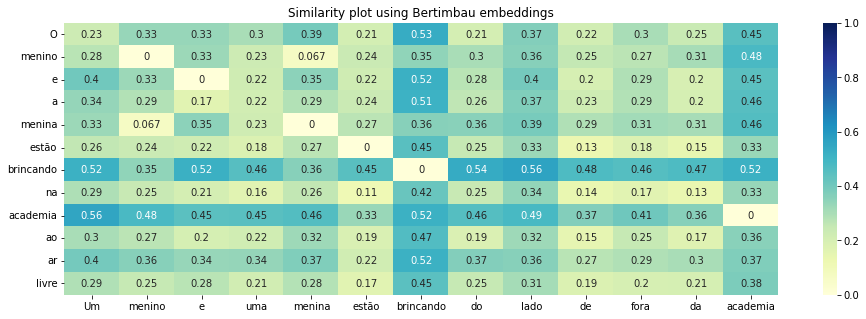

Similar words in two sentences are : {'Um': ['O'], 'menino': ['menino'], 'e': ['e'], 'uma': ['na'], 'menina': ['menina'], 'estão': ['estão'], 'brincando': ['brincando'], 'do': ['ao'], 'lado': ['livre'], 'de': ['estão'], 'fora': ['na'], 'da': ['na'], 'academia': ['academia']}


In [129]:
analyze_word_embed_1 = AnalyzeWordEmbeddings(first_sentence_1, first_sentence_2)
analyze_word_embed_1.bertimbau()